<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/07-trees/DecisionTrees_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

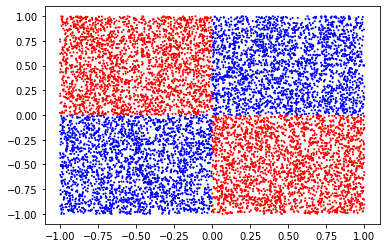

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

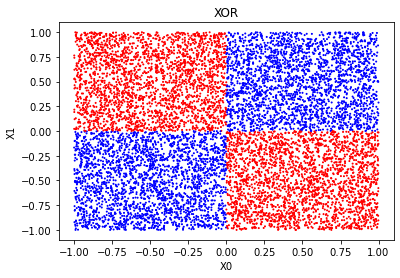

In [4]:
# generation of dataset and plotting 'XOR' problem
N = 10000
np.random.seed(42)
points = np.random.uniform(-1, 1, size=(N,2))
target = []
for i in range(N):
    if (points[i, 0] <= 0 and points[i, 1] <= 0) or (points[i, 0] >= 0 and points[i, 1] >= 0):
        target.append(0)
    else:
        target.append(1)

colors = np.array(['blue', 'red'])
plt.scatter(points[:, 0], points[:, 1], c = colors[target], s=1)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('XOR')

plt.show()

In [5]:
# training tree
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(points, target)
    predictions = clf.predict(points)
    accuracy = accuracy_score(target, predictions)
    print(f'For depth = {depth}, we have accuracy = {accuracy}')
    if accuracy > 0.99:
        min_max_depth = depth
        break
print('The min_max_depth with accuracy > 0.99 is {}'.format(sup_depth))

For depth = 1, we have accuracy = 0.5061
For depth = 2, we have accuracy = 0.5459
For depth = 3, we have accuracy = 0.943
For depth = 4, we have accuracy = 0.9994


NameError: name 'sup_depth' is not defined

In [ ]:
# plotting the tree structure for min_max_depth
plt.figure(figsize=(20, 12))
plot_tree(clf, filled=True)
plt.show()

In [ ]:
def boundary_decision(in_predictions):
    
    x0_min, x0_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    x1_min, x1_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x0_min, x0_max, 0.1),
                         np.arange(x1_min, x1_max, 0.1))
    
    Z = in_predictions(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='RdBu')
    plt.colorbar(plt.contourf(xx, yy, Z, cmap='RdBu'))
    plt.scatter(points[:, 0], points[:, 1], s=1, c=target, cmap='RdBu')

In [ ]:
# plotting boundary decisions
for i in range(1, min_max_depth):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(points, target)
    boundary_decision(lambda x: clf.predict(x))
    predictions = clf.predict(points)
    plt.title(f'DecisionTreeClassifier for max_depth = {i}')
    plt.plot([], [], ' ',
             label='Accuracy = {:.2f}'.format(accuracy_score(target, predictions)))
    plt.legend()
    plt.show()
    print('\n')

# Task 2 (3 points)

Consider the following dataset:

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

print(X_train.iloc[:5])
print(y_train[:5])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [7]:
# data preprocessing
for i in range(len(y_train)):
    if y_train[i] == 'malignant':
        y_train[i] = 2
    else:
        y_train[i] = 1

for i in range(len(y_test)):
    if y_test[i] == 'malignant':
        y_test[i] = 2
    else:
        y_test[i] = 1

In [8]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [9]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2])

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_best, tpr_best, fpr_runner_up, tpr_runner_up = [], [], [], []
best_roc_auc_score, runner_up_roc_auc_score = 0, 0

best_depth, runner_up_depth = 0, 0
best_train_accuracy, runner_up_train_accuracy = 0, 0
best_test_accuracy, runner_up_test_accuracy = 0, 0

for depth in range(1, 100):
    clf = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    predictions = clf.predict_proba(X_test)
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, predictions[:,1], pos_label=2)
    current_roc_auc_score = roc_auc_score(y_test, predictions[:,1])
    print(f'ROC-AUC score for DecisionTreeClassifier: {depth} - ', current_roc_auc_score)
    
    # figuring out the best parameters
    if current_roc_auc_score > best_roc_auc_score:
        runner_up_roc_auc_score, best_roc_auc_score = best_roc_auc_score, current_roc_auc_score
        runner_up_depth, best_depth = best_depth, depth
        runner_up_test_accuracy, best_test_accuracy = best_test_accuracy, accuracy_score(y_test, clf.predict(X_test))
        runner_up_train_accuracy, best_train_accuracy = best_train_accuracy, clf.score(X_train, y_train)
        fpr_runner_up, fpr_best = fpr_best, false_positive_rate
        tpr_runner_up, tpr_best = tpr_best, true_positive_rate

ROC-AUC score for DecisionTreeClassifier: 1 -  0.8649829497016197
ROC-AUC score for DecisionTreeClassifier: 2 -  0.9281756180733163
ROC-AUC score for DecisionTreeClassifier: 3 -  0.9377664109121908
ROC-AUC score for DecisionTreeClassifier: 4 -  0.9227408354646206
ROC-AUC score for DecisionTreeClassifier: 5 -  0.9072890025575447
ROC-AUC score for DecisionTreeClassifier: 6 -  0.898763853367434
ROC-AUC score for DecisionTreeClassifier: 7 -  0.9183716965046889
ROC-AUC score for DecisionTreeClassifier: 8 -  0.8835251491901108
ROC-AUC score for DecisionTreeClassifier: 9 -  0.9129369138959931
ROC-AUC score for DecisionTreeClassifier: 10 -  0.9031329923273657
ROC-AUC score for DecisionTreeClassifier: 11 -  0.9346760443307757
ROC-AUC score for DecisionTreeClassifier: 12 -  0.9041986359761296
ROC-AUC score for DecisionTreeClassifier: 13 -  0.9031329923273657
ROC-AUC score for DecisionTreeClassifier: 14 -  0.9129369138959931
ROC-AUC score for DecisionTreeClassifier: 15 -  0.9292412617220802
ROC-A

THE BEST
Best depth = 3
Train accuracy = 0.9835680751173709
Test accuracy = 0.9230769230769231
AUC = 0.9377664109121908


RUNNER-UP
Runner-up depth = 2
Train accuracy = 0.9624413145539906
Test accuracy = 0.9020979020979021
AUC = 0.9281756180733163




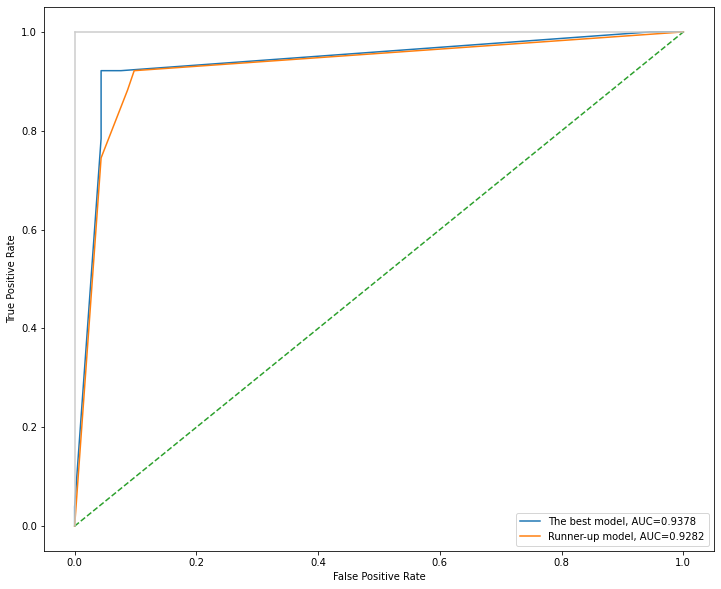

In [17]:
print(f'THE BEST\nBest depth = {best_depth}\nTrain accuracy = {best_train_accuracy}')
print(f'Test accuracy = {best_test_accuracy}\nAUC = {best_roc_auc_score}\n\n')

print(f'RUNNER-UP\nRunner-up depth = {runner_up_depth}\nTrain accuracy = {runner_up_train_accuracy}')
print(f'Test accuracy = {runner_up_test_accuracy}\nAUC = {runner_up_roc_auc_score}\n\n')

plt.figure(figsize=(12,10))
plt.plot(fpr_best, tpr_best, label="The best model, AUC={:.4f}".format(best_roc_auc_score))

plt.plot(fpr_runner_up, tpr_runner_up, label="Runner-up model, AUC={:.4f}".format(runner_up_roc_auc_score))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=0)